# Proyecto de Preprocesamiento de Datos

In [44]:
# Librería para la declaración y uso de Data Frames:
import pandas as pd

# Librería para gráficos:
import matplotlib.pyplot as plt

# Librería para visualizar y analizar nulos en Data Frames: 
import missingno as msno


# Librería pasar variables categóricas a numéricas:
#from sklearn.preprocessing import LabelEncoder


import numpy as np

from sklearn.impute import KNNImputer


## Paso 1 - Lectura de los datos:


En primer lugar, es necesario leer y guardar la información en una variable para poder empezar a trabajar con ella. 

Para ello, se ha guaradado el archivo con todos los datos en la ruta: */workspaces/machine-learning-python-template-clara/data/raw/AB_NYC_2019.csv* y se ha cargado en un Data Frame:

In [45]:
# Lectura del CSV con los datos, dada la ruta donde se guarda el archivo (se ha evitado cargar la primera columna con los índices de las filas):
df = pd.read_csv ('/workspaces/machine-learning-python-template-clara/data/raw/AB_NYC_2019.csv').iloc[:,1:]

# Configuración de pandas para mostrar todas las columnas del DataFrame sin truncarlas al visualizarlo
pd.set_option('display.max_columns', None)

# Se muestran las 5 primeras filas del Data Frame
df.head()


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Una vez se ha cargado correctamente la información en el Data Frame `df` es interesante evaluar la cantidad de información que se tiene. Para ello, se recurre al atributo `shape` del Data Frame:

In [46]:
# Se utiliza el atributo shape del Data Frame para conocer cuánta información está cargada:
print(f" El archivo cargado contiene {df.shape[0]} anuncios de casas en Airbnb, cada una ellas con un total de {df.shape[1]} características"); 

 El archivo cargado contiene 48895 anuncios de casas en Airbnb, cada una ellas con un total de 15 características


Ahora que ya se han cargado los datos y se tiene información sobre los mismos, se ha de proceder a realizar un filtrado de los datos realmente relevantes para el análisis. 

## Paso 2 - Limpieza a partir del Análisis de Constantes y Datos Duplicados:

Uno de los puntos críticos a la hora de realizar un análisis, es la **existencia de variables / características comunes a todos los anuncios**, dado que sería **información redundante** y no aportaría valor al estudio, es decir, el análisis sería el mismo aunque no estuviesen como variables y, por lo tanto, se podría prescindir de ellas.

Si se translada esto al Data Frame, estas **constantes** serían **valores comunes a todas las filas dentro de una misma columna**. 

Para detectarlas, se va a utilizar el método `nunique()` del Data Frame, de forma que se obtenga información sobre la cantidad de valores distintos dentro de cada columna:

In [47]:
# Se utiliza el método .nunique() para saber la cantidad de columnas con constantes en el Data Frame:
print(f" Hay un total de {(lambda df: (df.nunique() == 1).sum())(df)} columnas en el Data Frame con un valor constante para todos los anuncios");


# Se imprime el conteo de valores distintos en cada columna:
print (f" \nPara cada columna del Data Frame, se muestran cuántos valores distintos presentan:");
df.nunique()


 Hay un total de 0 columnas en el Data Frame con un valor constante para todos los anuncios
 
Para cada columna del Data Frame, se muestran cuántos valores distintos presentan:


name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

A partir del resultado obtenido, se puede observar que **no hay ninguna constante** en los datos cargados, por lo tanto, **no hay que eliminar ninguna columna**, de momento.

Otro factor determinante a la hora de realizar una limpieza de los datos es detectar **si hay datos repetidos**, aplicado a este caso, si hay **anuncios duplicados**. 

Para ello, se utiliza otro de los métodos que ofrecen los Data Frames `.duplicated()`

In [48]:
# Se utiliza el método .duplicated() para identificar los anuncios repetidos dentro del DataFrame:
print(f" Hay un total de {df.duplicated().sum()} anuncios duplicados.");

 Hay un total de 0 anuncios duplicados.


En este caso, **no se han encontrado anuncios duplicados** por lo que **no es necesario eliminar ninguna fila** del Data Frame.

## Paso 3 - Limpieza a partir de Información Estadística:

Una vez ya se ha realizado un **estudio básico** para realizar una **primera limpieza** de datos, a partir del análisis de constantes y duplicados, se puede pasar a **observar estadísticamente** la información y decidir qué datos son **poco relevantes**.

Para ello, en primer lugar, se va a recurrir al método `.describe()` para tener un **resumen estadístico** de todos los datos, tanto los categóricos como los numéricos.

En este resumen, los puntos más interesantes son, por un lado, los **mínimos y los máximos** en las variables **numéricas** y el **top value** y su **frecuencia** para las variables **categóricas**. 

In [49]:
# Descripción estadística básica de todas las columnas del DataFrame:
df.describe(include='all').T # Se traspone para ver de forma más clara los datos

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,48879,47905,Hillside Hotel,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,48895.0,NaN,NaN,NaN,67620010.64661,78610967.032667,2438.0,7822033.0,30793816.0,107434423.0,274321313.0
host_name,48874,11452,Michael,417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,48895,5,Manhattan,21661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,48895,221,Williamsburg,3920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,48895.0,NaN,NaN,NaN,40.728949,0.05453,40.49979,40.6901,40.72307,40.763115,40.91306
longitude,48895.0,NaN,NaN,NaN,-73.95217,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
room_type,48895,3,Entire home/apt,25409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,48895.0,NaN,NaN,NaN,152.720687,240.15417,0.0,69.0,106.0,175.0,10000.0
minimum_nights,48895.0,NaN,NaN,NaN,7.029962,20.51055,1.0,1.0,3.0,5.0,1250.0


Lo primero que llama la atención es el **mínimo a 0 unidades monetarias en la columna de 'Price'**. Este valor es completamente imposible en cualquier apartamento de Airbnb. 

Por ello, se puede **prescindir de todos los anuncios que tengan este valor** en la columna de precios, dado que se podría tratar de anuncios fraudulentos o con un error. 


In [50]:
# El Data Frame se filtra guardando solo las filas mayores de 0 en la columna "Price":
df = df[df['price'] > 0];

Al haber encontrado esta información *extraña* en la columna 'Price' del conjunto de datos, es interesante **mostrar en un gráfico cuál es la distribución de los precios** de los apartamentos para saber cómo se comporta esta característica.

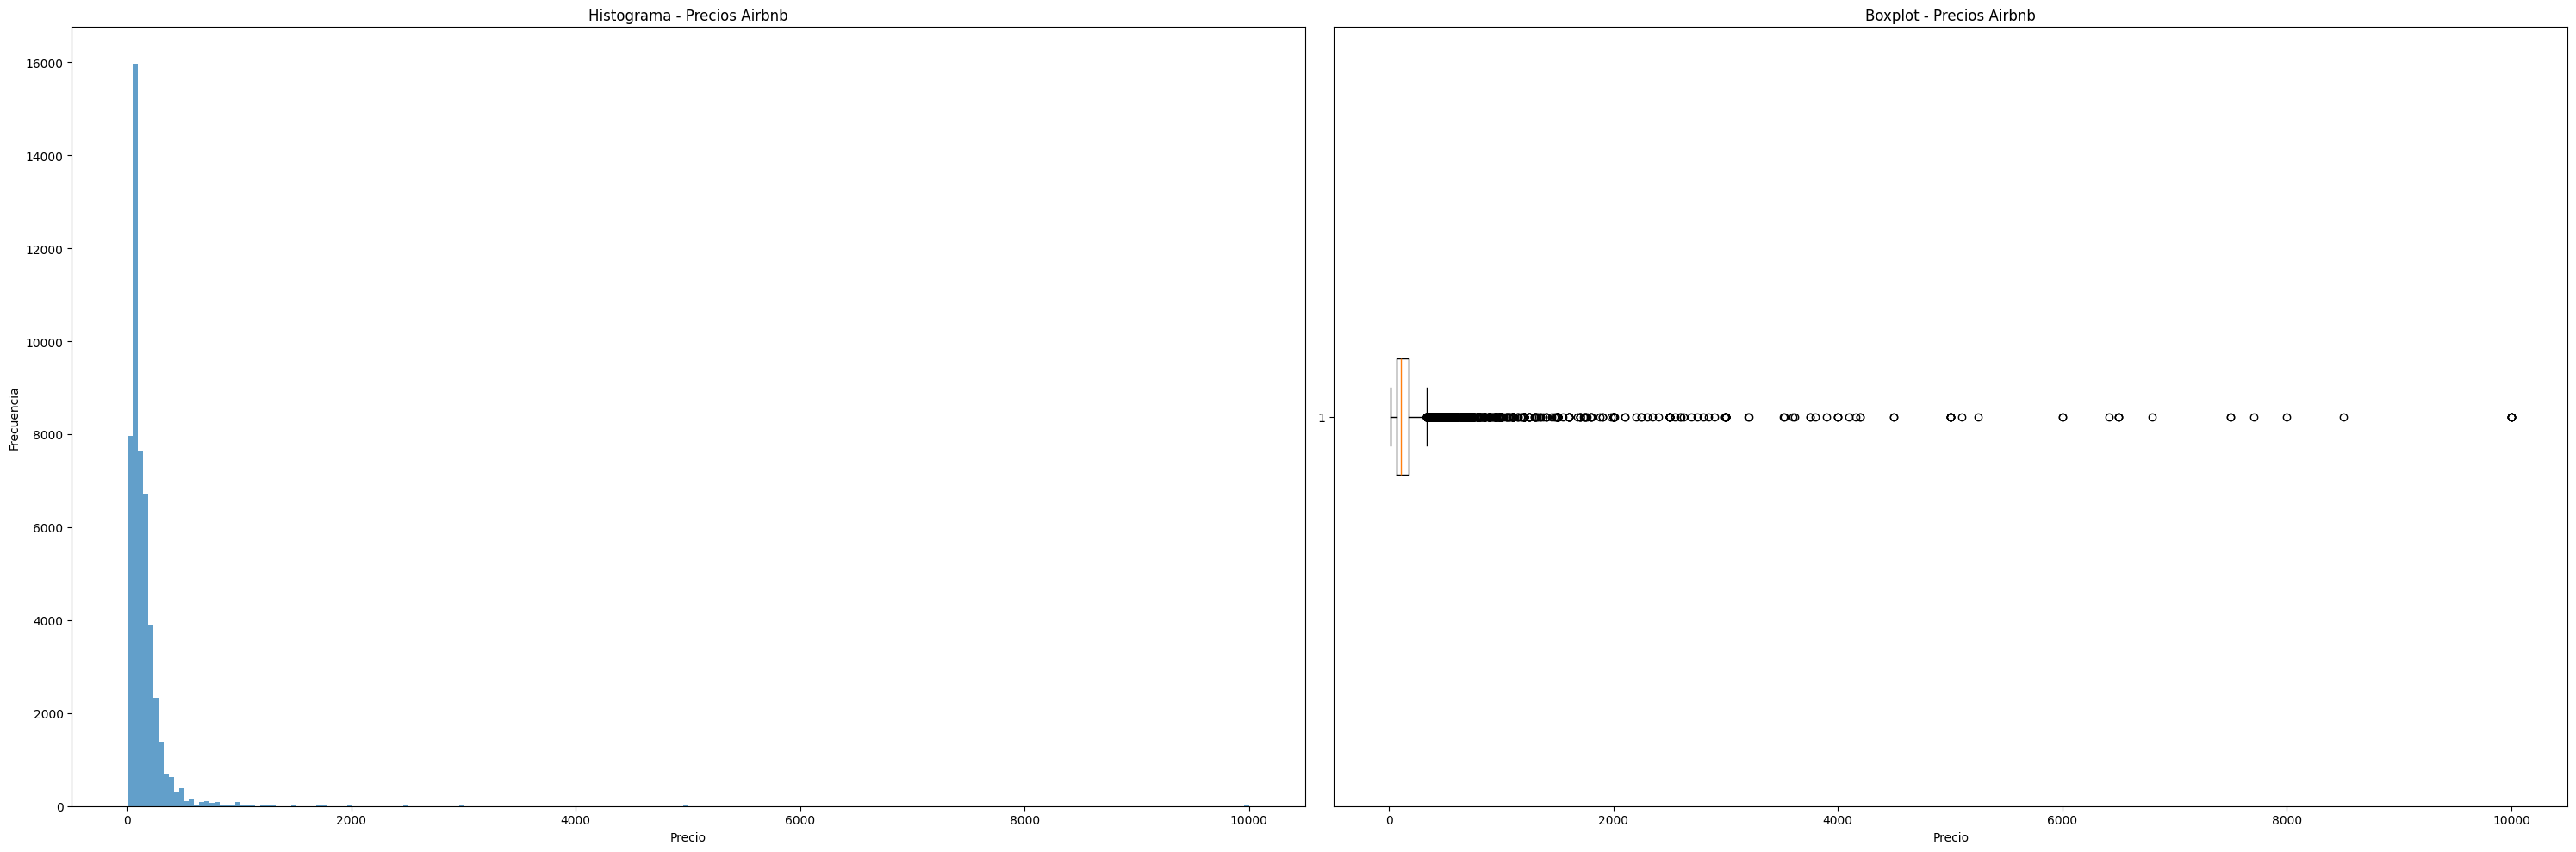

In [51]:
# Se trazan los gráficos utilizando la función de Matplotlib:
plt.figure(figsize = (30, 10));

# Subplot para el Histograma:
plt.subplot(1, 2, 1); 
plt.hist(df['price'], bins=220, alpha = 0.7); # Como estimación para saber el bins se ha usado el redondeo de la raíz cuadrada del total de los datos que se manejan
plt.title("Histograma - Precios Airbnb");
plt.xlabel('Precio');
plt.ylabel('Frecuencia');

# Subplot para la Boxplot: 
plt.subplot(1, 2, 2);
plt.boxplot(df['price'], vert = False);
plt.title("Boxplot - Precios Airbnb");
plt.xlabel("Precio");

# Mostrar la figura
plt.tight_layout()
plt.show()

En ambos gráficos es evidente que los precios tienen una **distribución altamente sesgada** con una mayoría de datos concentrados en **valores por debajo de las 2000 unidades monetarias** y **varios outliers significativos**.

Por esta razón, se va a realizar una **transformación logarítimica**, de forma que se reduzca la asimetría, comprimiendo los valores extremos. 

Esta transformación se colocará en **otra columna del Data Frame**, teniendo así una columna con los precios sin transformar, `price` y otra con los precios en logarítimico `log_price`.

Un punto importante es que, al haber eliminado previamente los anuncios cuyo precio era 0, no se va a tener problema en esta transformación. En caso de no haberlo hecho, se tendría que haber realizado este paso ahora, dado que el logaritmo de 0 es infinito. 

In [52]:
# Se genera otra columna con el precio en escala logarítmica:
df['log_price'] = np.log(df['price']);


Una vez se ha realizado esta transformación, es interesante volver a **trazar los gráficos anteriores** (histograma y boxplot) para comprobar que se ha eliminado la asimetría:

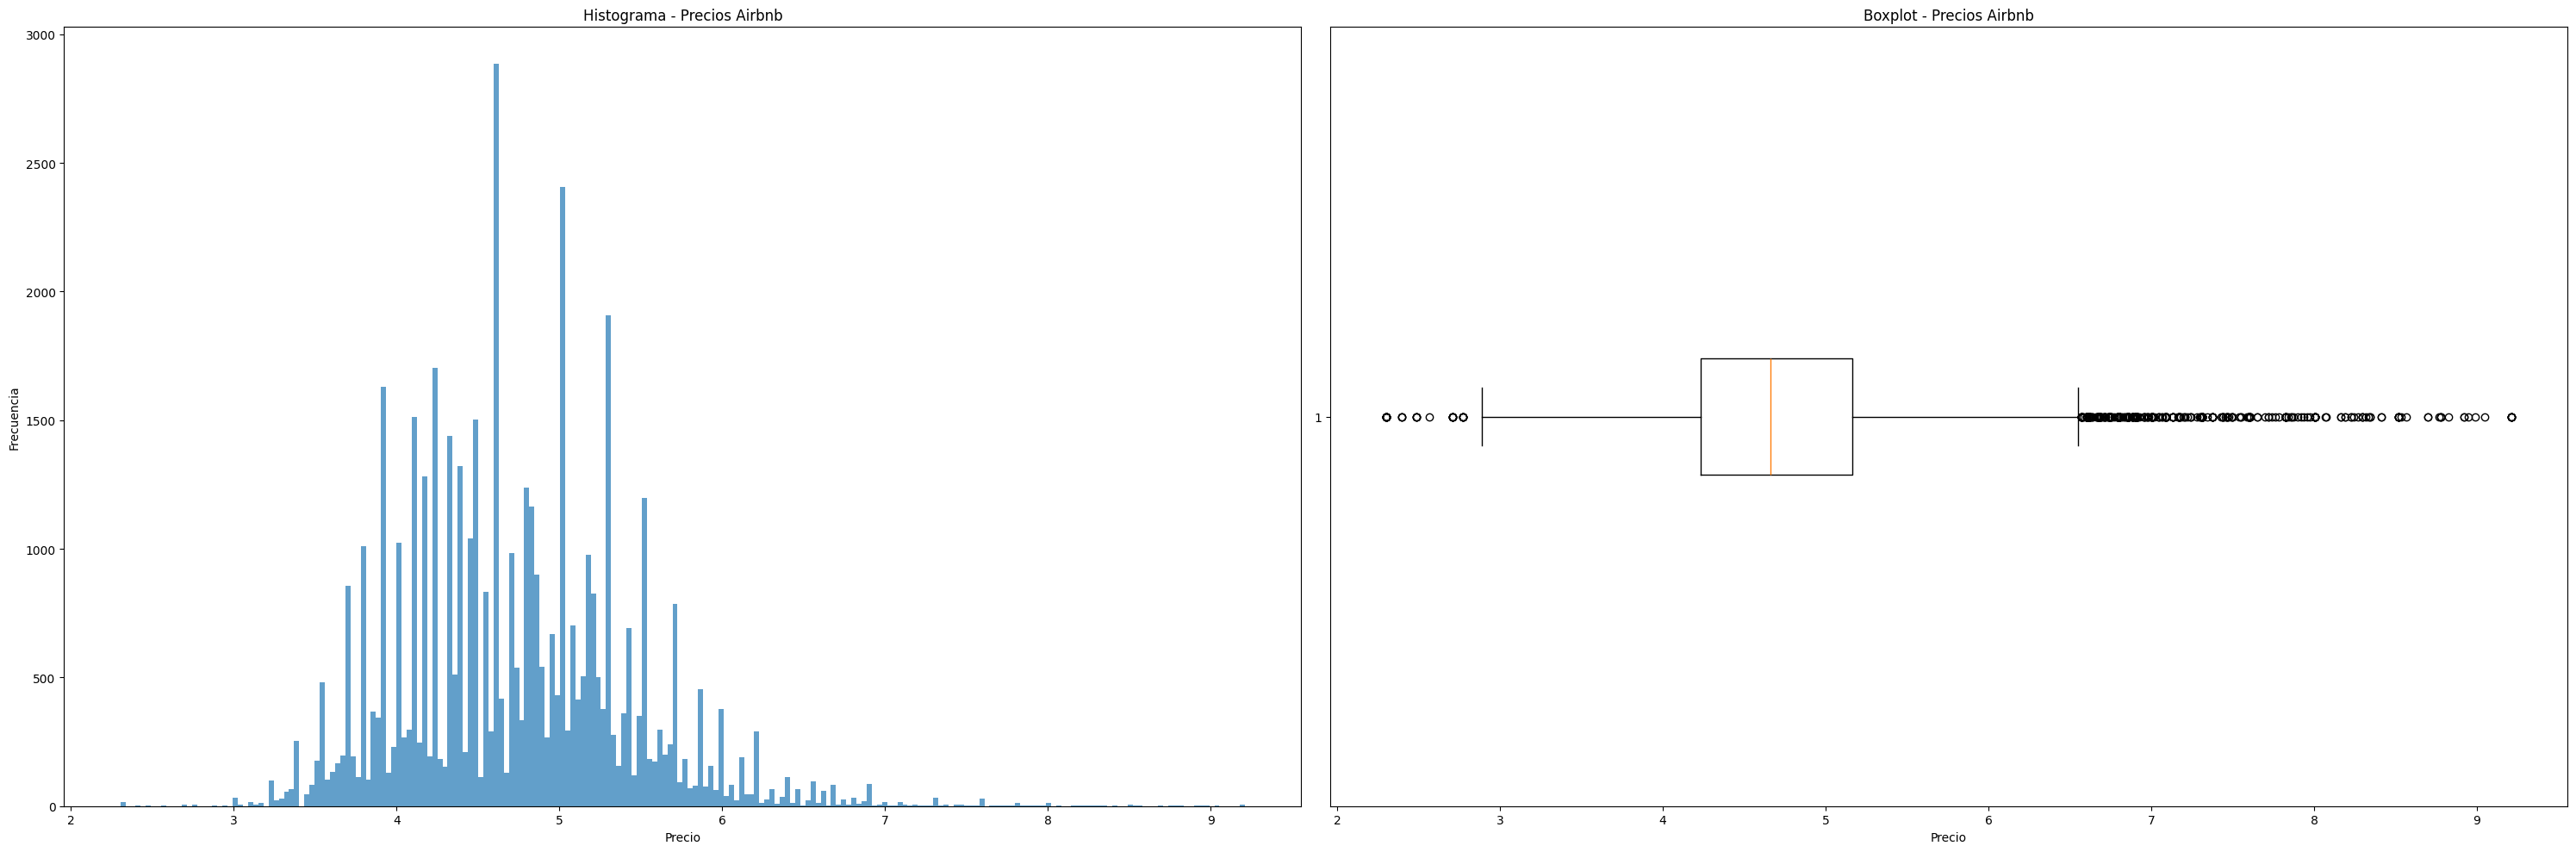

In [53]:
# Se trazan los grádicos utilizando la función de Matplotlib:
plt.figure(figsize = (30, 10));

# Subplot para el Histograma:
plt.subplot(1, 2, 1); 
plt.hist(df['log_price'], bins=220, alpha = 0.7); # Como estimación para saber el bins se ha usado el redondeo de la raíz cuadrada del total de los datos que se manejan
plt.title("Histograma - Precios Airbnb");
plt.xlabel('Precio');
plt.ylabel('Frecuencia');

# Subplot para la Boxplot: 
plt.subplot(1, 2, 2);
plt.boxplot(df['log_price'], vert = False);
plt.title("Boxplot - Precios Airbnb");
plt.xlabel("Precio");

# Mostrar la figura
plt.tight_layout()
plt.show()

Gracias a esta transformación, se ha **reducido en gran medida la asimetría** y, pese a seguir presentes, los **outliers tienen menos peso** en la representación. 

## Paso 4 - Limpieza a partir de Nulos:

Uno de los problemas que es habitual encontrarse en el análisis de datos es **variables sin valor**, **nulos**. 

Es por ello que se deben tratar estos casos para o bien **eliminarlos** o bien **rellenarlos** con un valor coherente para cada uno.

En primer lugar, para realizar el análisis, se va a obtener el **porcentaje de anuncios que presentan al menos un nulo** en alguna de las características. Para ello, se utiliza el método `.isnull().any()` explicitando que se debe realizar la búsqueda por columnas (`axis = 1`):



In [54]:
# Se comprueba el porcentaje de anuncios que presentan al menos un valor nulo:
print(f" El {round(df.isnull().any(axis=1).mean()*100, 2)} % de los anuncios presenta, al menos, un valor nulo en alguna de sus características descriptivas");

 El 20.61% de los anuncios presenta, al menos, un valor nulo en alguna de sus características descriptivas


Sabiendo que un porcentaje muy elevado de los anuncios tiene al menos un nulo en alguna de sus columnas, se va a evaluar, característica por característica, el porcentaje de nulos que se pueden encontrar en cada una de ellas madiante el método `.isnull()`.

In [19]:
# Se evalúa el porcentaje de nulos por característica:
df.isnull().mean()*100

name                               0.032731
host_id                            0.000000
host_name                          0.042959
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.560920
reviews_per_month                 20.560920
calculated_host_listings_count     0.000000
availability_365                   0.000000
log_price                          0.000000
dtype: float64

A través de la información arriba mostrada, es evidente que hay **dos características** que son las principales **aportadoras de nulos** al conjunto de datos: `last_review` y `reviews_per_month`. Además, ambas dos presentan exactamente el **mismo porcentaje** de valores faltantes, lo que da a entender que son los **mismos anuncios** donde esas dos características tienen nulos. 

Para comprobarlo, se va a utilizar la librería `missingno`, en concreto su método `.matrix()` para ver de una forma visual las filas en las que se encuentran los nulos en el Data Frame:

<Axes: >

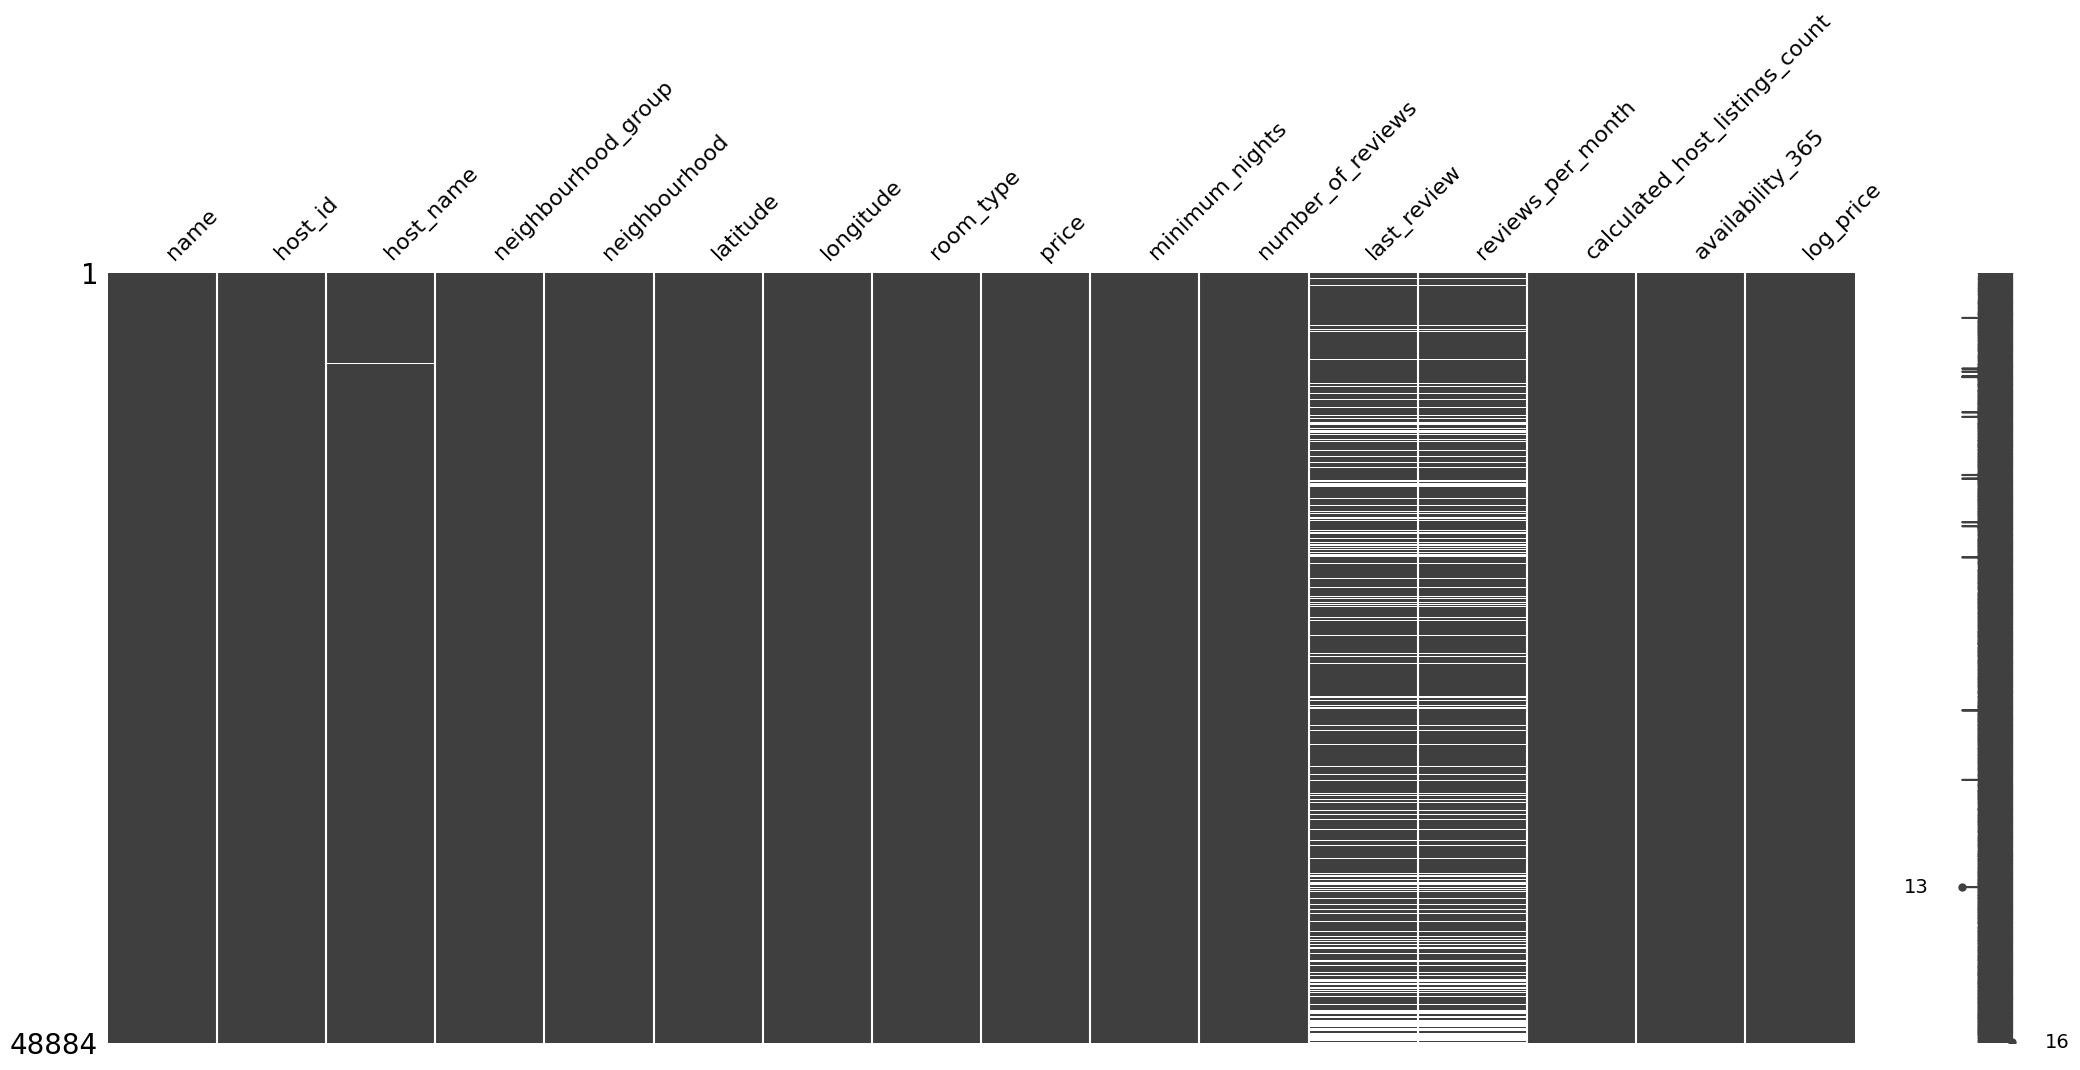

In [55]:
# Se obtiene de una forma visual dónde hay nulos en el Data Frame:
msno.matrix(df)

Como se había anticipado, las dos características `last_review` y `reviews_per_month`, presentan los **valores nulos en exactamente los mismos anuncios**. 

Teniendo en cuenta el **porcenaje tan alto** que presentan de valores faltantes, se debe **decidir si se eliminan** estas dos columnas o **si se rellenan** con algún valor coherente. 

En este caso, dado que se tiene **otra característica** dentro del conjunto de datos que también hace referencia a las *reviews*, `number_of_reviews`, que **no tiene ningún valor faltante** en ninguna de las filas del Data Frame, **se decide eliminar estas dos columnas**. 

Esta decisión también se podría haber tomado más adelante, cuando se evalúen las correlaciones, dado que ambas características presentarán una muy alta correlación entre ellas y con el número de reseñas, por lo que se debían eliminar antes o después. 

In [56]:
# Se eliminan las dos columnas con el porcentaje tan alto de nulos:
df.drop(['last_review', 'reviews_per_month'], axis=1, inplace=True);

Siguiendo con el análisis, se deben seguir estudiando el resto de **características que presentan nulos** para o bien eliminarlas o bien rellenarlas. 

Por un lado, la variable `host_name`, referenciando al **nombre de la persona** que alquila el apartamento / habitación, presenta un pequeño porcentaje de valores nulos. 

En este caso, en el Data Frame se cuenta con una columna llamada `host_id` que guarda un **identificador para esta persona arrendadora** y no presenta **ningún nulo**. Esto implica que se tiene **información redundante**, dado que se tiene dos columnas para identificar a una misma persona. Por esta razón, se decide eliminar la columna `host_name` al no aportar ninguna información adicional al conjunto de datos: 

In [57]:
# Se elimina la columna host_name:
df.drop(['host_name'], axis=1, inplace=True);

Finalmente, la otra característica que presenta un pequeño porcentaje de valores nulos es `name` haciendo referencia al **nombre del apartamento / habitación** en alquiler.

Este nombre **no da información real** acerca del apartamento, simplemente es una herramienta de marketing para poder alquilarlo. Por este motivo, y teniendo en cuenta que al trabajar en un DataFrame, la **identificación de cada anuncio se puede hacer de forma numérica a través del número de fila**, se decide **eliminar esta característica**:

In [58]:
# Se elimina la columna name:
df.drop(['name'], axis=1, inplace=True);

Después de realizar esta limpieza a partir de nulos, se comprueba que ya no hay ninguna fila con al menos un nulo: 

In [60]:
# Se comprueba el porcentaje de anuncios que presentan al menos un valor nulo:
print(f" El {round(df.isnull().any(axis=1).mean()*100, 2)} % de los anuncios presenta, al menos, un valor nulo en alguna de sus características descriptivas");

 El 0.0 % de los anuncios presenta, al menos, un valor nulo en alguna de sus características descriptivas


Finalmente, después de todas estas limpiezas realizadas, se comprueba cuánta información queda, es decir, se vuelve a utilizar el atributo `.shape` para saber el número de anuncios (filas) y el número de características (columnas).

In [61]:
# Se comprueba cuánta información queda después de la limpieza realizada:
print(f" El archivo cargado contiene {df.shape[0]} anuncios de casas en Airbnb, cada una ellas con un total de {df.shape[1]} características"); 


 El archivo cargado contiene 48884 anuncios de casas en Airbnb, cada una ellas con un total de 12 características


In [40]:
encoder = LabelEncoder();

df['neighbourhood_group_int'] = encoder.fit_transform(df['neighbourhood_group']);

df['room_type_int'] = encoder.fit_transform(df['room_type']);

# Eliminamos:
df.drop(['room_type', 'neighbourhood', 'neighbourhood_group'], axis=1, inplace=True)

In [41]:
df

,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,log_price,neighbourhood_group_int,room_type_int
0,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,5.003946,1,1
1,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,5.416100,2,0
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,NaN,NaN,1,365,5.010635,2,1
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,4.488636,1,0
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,4.382027,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Bedford-Stuyvesant,40.67853,-73.94995,70,2,0,NaN,NaN,2,9,4.248495,1,1
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Bushwick,40.70184,-73.93317,40,4,0,NaN,NaN,2,36,3.688879,1,1
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Harlem,40.81475,-73.94867,115,10,0,NaN,NaN,1,27,4.744932,2,0
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Hell's Kitchen,40.75751,-73.99112,55,1,0,NaN,NaN,6,2,4.007333,2,2


sorted_barrios = sorted(df['neighbourhood_group'].unique())
df['neighbourhood_group_num'] = 0;
sorted_barrios

for barrio in df['neighbourhood_group']:
    if barrio == 'Brooklyn':
        df['neighbourhood_group']

## Paso 5 - Identifcación de Observaciones Influyentes:

In [34]:
# Imputamos los valores faltantes usando el algoritmo knn
imputador_knn = KNNImputer(n_neighbors=3)
df_imputado = pd.DataFrame(imputador_knn.fit_transform(df), columns=df.columns)

ValueError: could not convert string to float: 'Clean & quiet apt home by the park'